In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
#read the pre-processed dataset 
df_house = pd.read_csv('melb_data_new.csv')

In [19]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13580 non-null  int64  
 13  Landsize       13580 non-null  int64  
 14  CouncilArea1   13580 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

In [20]:
df_house.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.713402,558.416127,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.859637,3990.669241,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,1.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,-37.408530,145.526350,21650.000000


In [21]:
df_house['Date'] = pd.to_datetime(df_house['Date'])

In [22]:
df_house.Date[:2]

0   2016-03-12
1   2016-04-02
Name: Date, dtype: datetime64[ns]

In [23]:
df_house['Month'] = df_house['Date'].dt.month
df_house['Month'][:5]
df_house['Date'].dt.weekday[:5]

0    3
1    4
2    4
3    4
4    4
Name: Month, dtype: int64

0    5
1    5
2    0
3    0
4    2
Name: Date, dtype: int64

In [24]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  int64         
 13  Landsize       13580 non-null  int64         
 14  CouncilArea1   13580 non-null  object        
 15  Lattitude      1358

## feature encoding and scaling

Encoding Categorical Variables: 

https://blog.csdn.net/SHU15121856/article/details/102100689: 常用的特征编码手段


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

In [31]:
numeric_features = df_house.select_dtypes(['int64', 'float']).columns
numeric_features, len(numeric_features)

(Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'Month'],
       dtype='object'),
 12)

In [32]:
categorical_features = df_house.select_dtypes('object').columns

categorical_features, len(categorical_features)

(Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea1',
        'Regionname'],
       dtype='object'),
 7)

In [41]:
# use "label encoding" for "Method","SellerG","CouncilArea1", "regionname"
# use "one-hot encoding" for "type"

cat_features1 = ['Suburb','Method', 'SellerG','CouncilArea1', 'Regionname']

# cat_features2 = ['Type']

# num_features = ['Rooms','Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
#                 'Lattitude', 'Longtitude', 'Propertycount']


In [42]:
df_e = df_house.copy()

In [43]:
# encoding cat_1
for column in cat_features1:
    
    label_encoder = LabelEncoder()
    
    df_e[column] = label_encoder.fit_transform(df_e[column])

In [44]:
# one hot encoding for "Type"
house_type = pd.get_dummies(df_e['Type'], drop_first=True)
df_e = pd.merge(df_e,house_type, left_index=True, right_index=True)
df_e.drop('Type', axis=1, inplace=True)

In [45]:
df_e.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,CouncilArea1,Lattitude,Longtitude,Regionname,Propertycount,Month,t,u
0,0,85 Turner St,2,1480000,1,23,2016-03-12,2.5,3067,2,...,1,202,32,-37.7996,144.9984,2,4019,3,0,0
1,0,25 Bloomburg St,2,1035000,1,23,2016-04-02,2.5,3067,2,...,1,156,32,-37.8079,144.9934,2,4019,4,0,0
2,0,5 Charles St,3,1465000,3,23,2017-04-03,2.5,3067,3,...,1,134,32,-37.8093,144.9944,2,4019,4,0,0
3,0,40 Federation La,3,850000,0,23,2017-04-03,2.5,3067,3,...,1,94,32,-37.7969,144.9969,2,4019,4,0,0
4,0,55a Park St,4,1600000,4,155,2016-04-06,2.5,3067,3,...,2,120,32,-37.8072,144.9941,2,4019,4,0,0


In [49]:
cat_features2 = ['t','u']

num_features = ['Rooms','Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
                 'Lattitude', 'Longtitude', 'Propertycount']

Xs= list(num_features) + list(cat_features1) + list(cat_features2)
Xs

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Suburb',
 'Method',
 'SellerG',
 'CouncilArea1',
 'Regionname',
 't',
 'u']

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
norm = MinMaxScaler().fit(df_e[Xs])
X_norm = norm.transform(df_e[Xs]) 

In [53]:
Y = df_e['Price']

In [54]:
X_norm, Y

(array([[0.11111111, 0.05197505, 0.06857728, ..., 0.28571429, 0.        ,
         0.        ],
        [0.11111111, 0.05197505, 0.06857728, ..., 0.28571429, 0.        ,
         0.        ],
        [0.22222222, 0.05197505, 0.06857728, ..., 0.28571429, 0.        ,
         0.        ],
        ...,
        [0.22222222, 0.14137214, 0.01637666, ..., 0.85714286, 0.        ,
         0.        ],
        [0.33333333, 0.14137214, 0.01637666, ..., 0.85714286, 0.        ,
         0.        ],
        [0.33333333, 0.13097713, 0.01330604, ..., 0.85714286, 0.        ,
         0.        ]]),
 0        1480000
 1        1035000
 2        1465000
 3         850000
 4        1600000
           ...   
 13575    1245000
 13576    1031000
 13577    1170000
 13578    2500000
 13579    1285000
 Name: Price, Length: 13580, dtype: int64)

## dataset spliting: training and testing

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [66]:
def Predictive_Model(estimator):
    estimator.fit(train_X, train_y)
    prediction = estimator.predict(test_X)
    print('R_squared:', metrics.r2_score(test_y, prediction))
    print('MSE:', metrics.mean_squared_error(test_y, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(test_y, prediction)))
    plt.figure(figsize=(10,5))
    sns.distplot(test_y, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.xlim(0,)
def FeatureBar(model_Features, Title, yLabel):
    plt.figure(figsize=(10,5))
    plt.bar(df.columns[df.columns!='Price'].values, model_Features)
    plt.xticks(rotation=45)
    plt.title(Title)
    plt.ylabel(yLabel)

In [59]:
train_X, test_X, train_y, test_y = train_test_split(X_norm,Y,test_size=0.3, random_state=0)
print("Total size: ", df_e.shape[0])
print("Train size: ", train_X.shape, train_y.shape)
print("Test size: ", test_X.shape, test_y.shape)

Total size:  13580
Train size:  (9506, 17) (9506,)
Test size:  (4074, 17) (4074,)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost import XGBRegressor

In [68]:
# lr_model = LinearRegression()
# lr_model.fit(train_X, train_y)
# lr_score = lr_model.score(test_X, test_y )
# lr_score

LinearRegression()

0.5638108022853139

R_squared: 0.5638108022853139
MSE: 179243035112.9039
Square Root of MSE: 423371.0371682313


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


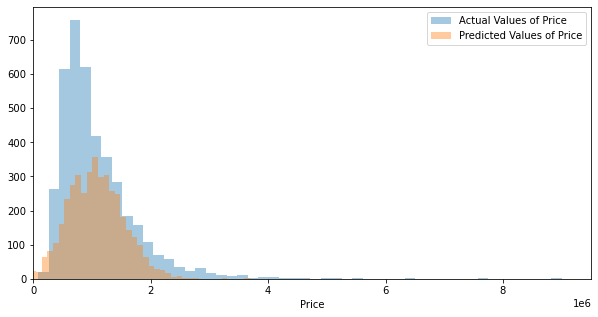

In [69]:
#linear regression: 
lr = LinearRegression()
Predictive_Model(lr)

The R² of the linear regression is 0.5638, i.e., 56% of the variance of the housing prices in the data can be predicted by the model. The RMSE is 423371. This means that for all the predictions for the testing set, the average difference for each prediction is $423371.

R_squared: 0.6218755032554215
Square Root of MSE: 394185.911834965


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


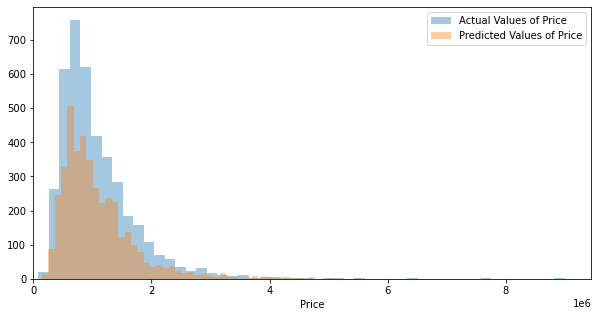

In [64]:
#decision tree

dt = DecisionTreeRegressor(max_depth=17, random_state=0)
Predictive_Model(dt)

the `max depth` is  to prevent the over-fitting. As the depth of the tree is greater, the tree has more branches and becomes bigger. As the tree has more branches, the prediction for the training set can be more accurate. However, there is a bigger variance in predicting the testing set. 

R_squared: 0.5609795526096564
MSE: 180406479296.49692
Square Root of MSE: 424742.8390173246


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


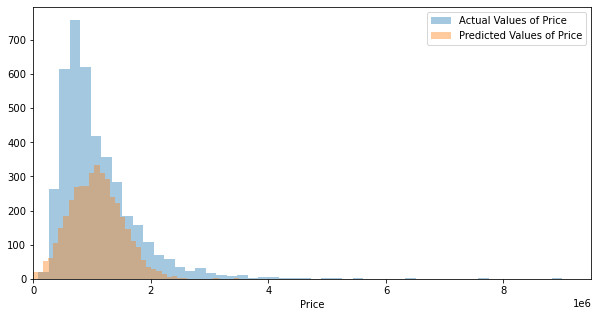

In [78]:
#Ridge
rr = Ridge(alpha=10)
Predictive_Model(rr)

regularization parameter `alpha`, the smaller the better. Reason??

R_squared: 0.7609336752551821
MSE: 98239419648.75838
Square Root of MSE: 313431.6825861074


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


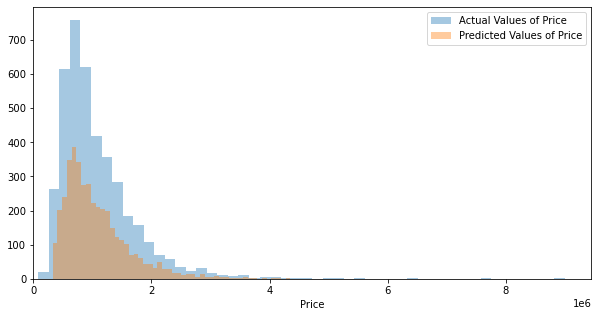

In [80]:
#random forest
RF = RandomForestRegressor(max_leaf_nodes=500, random_state=1)
Predictive_Model(RF)

R_squared: 0.7500764078013399
MSE: 102700991786.84732
Square Root of MSE: 320469.9545774101


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


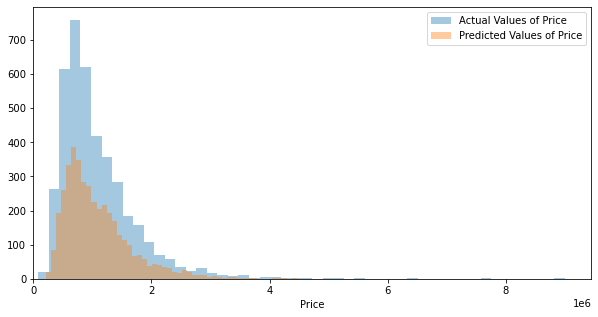

In [81]:
#bagging
BGR = BaggingRegressor()
Predictive_Model(BGR)

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

R_squared: 0.2463714326617612
MSE: 309688255613.0006
Square Root of MSE: 556496.4111411687


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


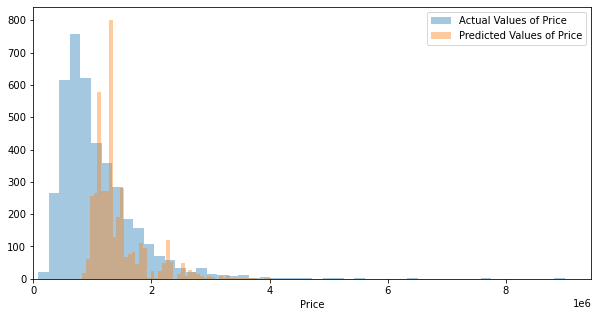

In [90]:
#adaboost
ADB = AdaBoostRegressor(n_estimators=300, random_state=0)
Predictive_Model(ADB)

????? how to explain?, random state = 1, 更低

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

R_squared: 0.7668238142620342
MSE: 95818987418.07379
Square Root of MSE: 309546.42207280284


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


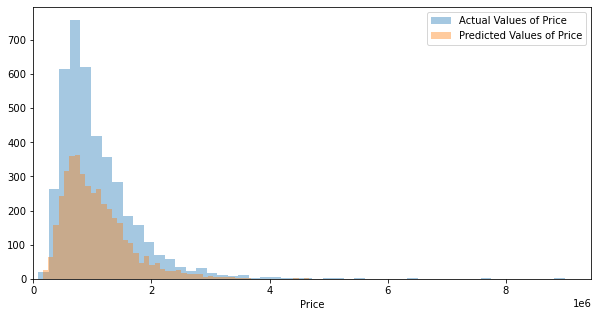

In [86]:
#Gradient Boosting 
GBR = GradientBoostingRegressor(n_estimators=300, random_state=1)
Predictive_Model(GBR)

R_squared: 0.7745865696069737
MSE: 92629041779.44743
Square Root of MSE: 304350.1959576294


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


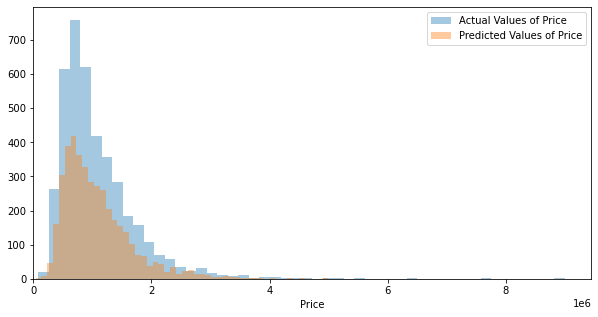

In [91]:
XGBR = XGBRegressor()
Predictive_Model(XGBR)

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [95]:
regressor = ['Linear Regression', 'Decision Tree','Random Forest', 'Ridge Regression',
             'Bagging','AdaBoost', 'Gradient Boosting', 'XGBoosting']
models = [LinearRegression(), DecisionTreeRegressor(max_depth=17, random_state=0), 
          RandomForestRegressor(max_leaf_nodes=500, random_state=1),Ridge(alpha=10),BaggingRegressor(), 
         AdaBoostRegressor(n_estimators=300, random_state=0),GradientBoostingRegressor(n_estimators=300, random_state=1),
         XGBRegressor()]
R_squared = []
MSE = []
RMSE = []
for m in models:
    m.fit(train_X, train_y)
    prediction_m = m.predict(test_X)
    r2 = metrics.r2_score(test_y, prediction_m)
    mse = metrics.mean_squared_error(test_y, prediction_m)
    rmse = np.sqrt(metrics.mean_squared_error(test_y, prediction_m))
    R_squared.append(r2)
    MSE.append(mse)
    RMSE.append(rmse)
basic_result = pd.DataFrame({'R squared':R_squared,'MSE': MSE, 'RMSE':RMSE}, index=regressor)
basic_result

LinearRegression()

DecisionTreeRegressor(max_depth=17, random_state=0)

RandomForestRegressor(max_leaf_nodes=500, random_state=1)

Ridge(alpha=10)

BaggingRegressor()

AdaBoostRegressor(n_estimators=300, random_state=0)

GradientBoostingRegressor(n_estimators=300, random_state=1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

,R squared,MSE,RMSE
Linear Regression,0.563811,1.792430e+11,423371.037168
Decision Tree,0.621876,1.553825e+11,394185.911835
Random Forest,0.760934,9.823942e+10,313431.682586
Ridge Regression,0.560980,1.804065e+11,424742.839017
Bagging,0.748382,1.033972e+11,321554.289173
AdaBoost,0.246371,3.096883e+11,556496.411141
Gradient Boosting,0.766824,9.581899e+10,309546.422073
XGBoosting,0.774587,9.262904e+10,304350.195958
